In [38]:
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer

### What is TF-IDF?

- TF stands for **Term Frequency** and denotes the ratio of  number of times a particular word appeared in a Document to total number of words in the document.
          
         Term Frequency(TF) = [number of times word appeared / total no of words in a document]
 
- Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.


- IDF stands for **Inverse Document Frequency** and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

         Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]
        
- In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0. 


- Finally:
         
         TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)

In [39]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [40]:
v = TfidfVectorizer()
TransformedOutput = v.fit_transform(corpus)

In [41]:
arr = np.array(TransformedOutput[0].toarray())

In [42]:
arr = arr.reshape(-1)

In [43]:
word = corpus[0].split()
word

['Thor',
 'eating',
 'pizza,',
 'Loki',
 'is',
 'eating',
 'pizza,',
 'Ironman',
 'ate',
 'pizza',
 'already']

In [44]:
for i in range(len(word)):
    print(word[i], " : ", arr[i])

Thor  :  0.2426654728284301
eating  :  0.0
pizza,  :  0.0
Loki  :  0.0
is  :  0.0
eating  :  0.0
pizza,  :  0.0
Ironman  :  0.2426654728284301
ate  :  0.0
pizza  :  0.0
already  :  0.40286636477562926


In [45]:
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [48]:
featureNames = v.get_feature_names_out()

for word in featureNames:
    ind = v.vocabulary_.get(word)
    print("For '{}' the idf is: '{}'".format(word, v.idf_[ind]))

For 'already' the idf is: '2.386294361119891'
For 'am' the idf is: '2.386294361119891'
For 'amazon' the idf is: '2.386294361119891'
For 'and' the idf is: '2.386294361119891'
For 'announcing' the idf is: '1.2876820724517808'
For 'apple' the idf is: '2.386294361119891'
For 'are' the idf is: '2.386294361119891'
For 'ate' the idf is: '2.386294361119891'
For 'biryani' the idf is: '2.386294361119891'
For 'dot' the idf is: '2.386294361119891'
For 'eating' the idf is: '1.9808292530117262'
For 'eco' the idf is: '2.386294361119891'
For 'google' the idf is: '2.386294361119891'
For 'grapes' the idf is: '2.386294361119891'
For 'iphone' the idf is: '2.386294361119891'
For 'ironman' the idf is: '2.386294361119891'
For 'is' the idf is: '1.1335313926245225'
For 'loki' the idf is: '2.386294361119891'
For 'microsoft' the idf is: '2.386294361119891'
For 'model' the idf is: '2.386294361119891'
For 'new' the idf is: '1.2876820724517808'
For 'pixel' the idf is: '2.386294361119891'
For 'pizza' the idf is: '2.

### Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification


- This data consists of two columns.

| Text | Label | 
| --- | --- |
| Indira Designer Women's Art Mysore Silk Saree With Blouse Piece (Star-Red) This Saree Is Of Art Mysore Silk & Comes With Blouse Piece. | Clothing & Accessories | 
|IO Crest SY-PCI40010 PCI RAID Host Controller Card Brings new life to any old desktop PC. Connects up to 4 SATA II high speed SATA hard disk drives. Supports Windows 8 and Server 2012|Electronics|
|Operating Systems in Depth About the Author Professor Doeppner is an associate professor of computer science at Brown University. His research interests include mobile computing in education, mobile and ubiquitous computing, operating systems and distribution systems, parallel computing, and security.|Books|

- ***Text***: Description of an item sold on e-commerce website
- ***Label***: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.


In [49]:
df = pd.read_csv('Ecommerce_data.csv')
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [52]:
df['label'].value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [53]:
df['label_Code'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

In [59]:
### utlity function for pre-processing the text
import spacy

nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if not (token.is_stop or token.is_punct):
            filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [60]:
df['Preprocessed_Text'] = df['Text'].apply(preprocess)

In [63]:
from sklearn.model_selection import train_test_split
x = df['Preprocessed_Text']
y = df['label_Code']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify = y, random_state = True)

In [64]:
y_train.value_counts()

label_Code
0    4800
2    4800
1    4800
3    4800
Name: count, dtype: int64

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [66]:
df['Preprocessed_Text'][0]

'Urban Ladder Eisner low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

In [84]:
## Now making a pipeline 
pipeRF = Pipeline([
    ('vectorizerTfIDF', TfidfVectorizer()),
    ('Random_Forest', RandomForestClassifier())
])

pipeRF.fit(x_train, y_train)
RFpred = pipeRF.predict(x_test)

print("The classification report is: \n", classification_report(y_test, RFpred))
print("\nThe accuracy score is: \n", accuracy_score(y_test, RFpred))

The classification report is: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1200
           1       0.99      0.98      0.98      1200
           2       0.99      0.98      0.98      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800


The accuracy score is: 
 0.9810416666666667


Text(8.222222222222223, 0.5, 'Truth')

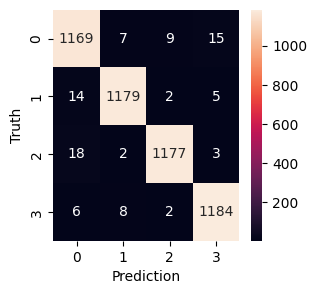

In [86]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (3,3))
sn.heatmap(confusion_matrix(y_test, RFpred), annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [68]:
## There is a feature in pipeline by which we can use the intermediate step of a pipeline
## So using the result of tf-idf vectorizer
x_trainIDF = pipeRF.named_steps['vectorizerTfIDF'].transform(x_train)
x_testIDF = pipeRF.named_steps['vectorizerTfIDF'].transform(x_test)

In [73]:
knn = KNeighborsClassifier()
knn.fit(x_trainIDF, y_train)
knnPred = knn.predict(x_testIDF)

print("The classification report is: \n", classification_report(y_test, knnPred))
print("\nThe accuracy score is: \n", accuracy_score(y_test, knnPred))
print("\nThe confusion matrix is: \n", confusion_matrix(y_test, knnPred))

The classification report is: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.98      0.97      0.98      1200
           3       0.97      0.98      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800


The accuracy score is: 
 0.966875

The confusion matrix is: 
 [[1151   18   16   15]
 [  34 1146    8   12]
 [  15   10 1170    5]
 [  15    6    5 1174]]


In [74]:
nb = MultinomialNB()
nb.fit(x_trainIDF, y_train)
nbPred = knn.predict(x_testIDF)

print("The classification report is: \n", classification_report(y_test, nbPred))
print("\nThe accuracy score is: \n", accuracy_score(y_test, nbPred))
print("\nThe confusion matrix is: \n", confusion_matrix(y_test, nbPred))

The classification report is: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.98      0.97      0.98      1200
           3       0.97      0.98      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800


The accuracy score is: 
 0.966875

The confusion matrix is: 
 [[1151   18   16   15]
 [  34 1146    8   12]
 [  15   10 1170    5]
 [  15    6    5 1174]]
